In [1]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
import numpy as np
import matplotlib.pyplot as plt

### Create base vector

In [2]:
gamma_wave = 0.5
N_shift = 2
state = "|1,1>"
bv = BasicStateJitter(state,offset=np.linspace(-3*gamma_wave,3*gamma_wave,N_shift))

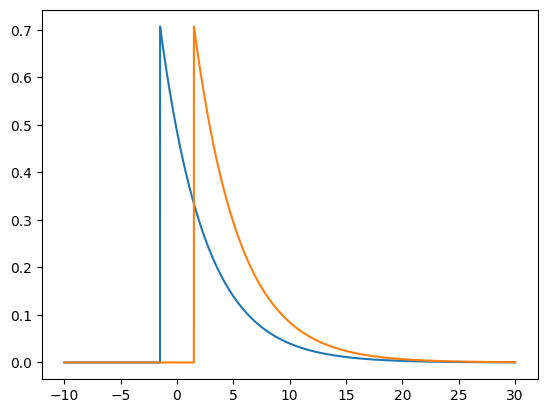

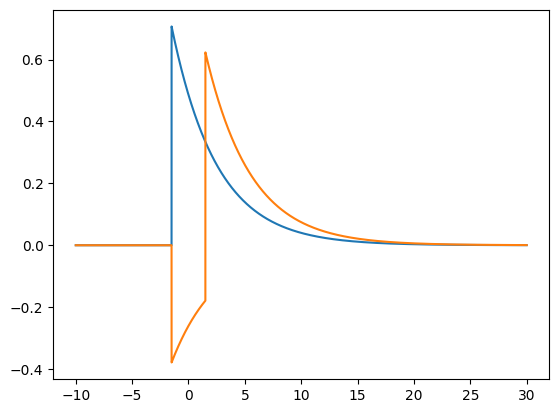

In [3]:
bv.print_vect()

In [4]:
print(bv.coef_matrix)

[[1.00028741 0.        ]
 [0.4724312  0.88160823]]


In [5]:
print(bv.vector_list)

[[0.         0.         0.         ... 0.00026933 0.00026906 0.00026879]
 [0.         0.         0.         ... 0.00057017 0.0005696  0.00056903]]


In [6]:
print(bv.vector_list_ortho)

[[0.         0.         0.         ... 0.00026933 0.00026906 0.00026879]
 [0.         0.         0.         ... 0.00057017 0.0005696  0.00056903]]
